In [12]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import datetime
import plotly
from plotly import graph_objs as go

In [4]:
djia_constituents = pd.read_csv(r"C:\Users\malani\Documents\Mean-Reversion-Algorithm-Trading-Bot\Stocks in the Dow Jones Industrial Average.csv")
djia_constituents = djia_constituents.drop(25)
djia_constituents.tail()

,Symbol,Description,Category2,GICS Sector,Market cap,Market Cap Weight,Index Weight,Dividend yield,Country,Action
24,KO,Coca-Cola,Common stocks,Consumer Staples,"$262,541,200,257",2.60%,1.19%,2.84%,USA,Analyze
26,CSCO,Cisco Systems Inc,Common stocks,Information Technology,"$191,431,049,741",1.90%,0.89%,3.21%,USA,Analyze
27,WBA,Walgreen Boots Alliance Inc,Common stocks,Consumer Staples,"$34,704,949,342",0.34%,0.75%,4.69%,USA,Analyze
28,VZ,Verizon Communications Inc,Common stocks,Communication Services,"$160,265,033,778",1.59%,0.75%,6.60%,USA,Analyze
29,INTC,Intel Corporation Corp,Common stocks,Information Technology,"$123,356,030,000",1.22%,0.58%,4.80%,USA,Analyze


In [41]:
# sample = pd.DataFrame(columns=['Ticker', 'Prices'])
sample = {}

# Add a risk tolerence in the future 

for i in range(len(djia_constituents)):
    ticker=yf.Ticker(djia_constituents.iat[i, 0])
    data = ticker.history(period='100d')
    del data['Dividends']
    del data['Stock Splits']
    del data['Open']
    del data['High']
    del data['Low']
    del data['Volume']
    data["STD"] = data["Close"].rolling(20).std()
    data["MIDDLEBB"] = data["Close"].rolling(20).mean()
    data["UPPERBB"] = data["MIDDLEBB"] + 2 * data["STD"]
    data["LOWERBB"] = data["MIDDLEBB"] - 2 * data["STD"]
    data["LOWER_THRESH"] = (data["LOWERBB"] + data["MIDDLEBB"]*0.98) / 2
    data["HIGHER_THRESH"] = (data["UPPERBB"] + data["MIDDLEBB"]*1.02) / 2
    data = data.tail(data.shape[0] -20)
    del data["STD"]
    del data["MIDDLEBB"]

    # sample.insert(i, "Ticker", ticker)
    sample.update({djia_constituents.iat[i, 0] : data})

print(sample['AAPL'])

                                Close     UPPERBB     LOWERBB  LOWER_THRESH  \
Date                                                                          
2022-07-29 00:00:00-04:00  162.015808  160.985352  137.445369    141.838211   
2022-08-01 00:00:00-04:00  161.018860  162.104894  138.576962    142.955536   
2022-08-02 00:00:00-04:00  159.523407  162.867406  139.653838    143.944624   
2022-08-03 00:00:00-04:00  165.624817  164.919902  139.915285    144.642263   
2022-08-04 00:00:00-04:00  165.305786  166.743755  140.031513    145.175698   
...                               ...         ...         ...           ...   
2022-11-14 00:00:00-05:00  148.279999  156.658121  134.461259    138.554878   
2022-11-15 00:00:00-05:00  150.039993  157.114169  134.658017    138.813194   
2022-11-16 00:00:00-05:00  148.789993  157.391034  134.897977    139.059796   
2022-11-17 00:00:00-05:00  150.720001  157.854445  135.191313    139.391867   
2022-11-18 00:00:00-05:00  151.289993  158.266207  1

<AxesSubplot:xlabel='Date'>

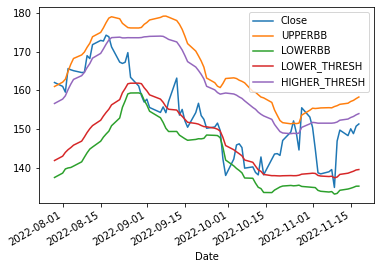

In [43]:
sample['AAPL'].plot()